# UAS Data Science - Hilmi Abdullah (0110223313)

## Analisis Data E-Commerce Looker

Dataset yang dianalisis:
- users.csv: Data pengguna/pelanggan
- product.csv: Data produk
- order.csv: Data pesanan/transaksi
- inventory.csv: Data inventori

## 1. Data Loading dan Preprocessing

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [22]:
# Load datasets
users_df = pd.read_csv('data/users.csv')
product_df = pd.read_csv('data/product.csv')
order_df = pd.read_csv('data/order.csv')
inventory_df = pd.read_csv('data/inventory.csv')

print(f"Users: {users_df.shape}")
print(f"Products: {product_df.shape}")
print(f"Orders: {order_df.shape}")
print(f"Inventory: {inventory_df.shape}")

Users: (100000, 15)
Products: (29120, 9)
Orders: (181053, 11)
Inventory: (489011, 12)


In [23]:
# Data preprocessing and missing value handling
# Convert datetime columns
users_df['created_at'] = pd.to_datetime(users_df['created_at'], format='mixed', utc=True)
order_df['created_at'] = pd.to_datetime(order_df['created_at'], format='mixed', utc=True)

# Check for missing values in detail
print("Missing values per dataset:")
print("\n1. Users dataset:")
users_missing = users_df.isnull().sum()
print(users_missing[users_missing > 0])
if users_missing.sum() == 0:
    print("No missing values found")

print("\n2. Products dataset:")
products_missing = product_df.isnull().sum()
print(products_missing[products_missing > 0])
if products_missing.sum() == 0:
    print("No missing values found")

print("\n3. Orders dataset:")
orders_missing = order_df.isnull().sum()
print(orders_missing[orders_missing > 0])
if orders_missing.sum() == 0:
    print("No missing values found")

print("\n4. Inventory dataset:")
inventory_missing = inventory_df.isnull().sum()
print(inventory_missing[inventory_missing > 0])
if inventory_missing.sum() == 0:
    print("No missing values found")

# Handle missing values if any exist
# Check for duplicates
print(f"\nDuplicate analysis:")
print(f"Users duplicates: {users_df.duplicated().sum()}")
print(f"Products duplicates: {product_df.duplicated().sum()}")
print(f"Orders duplicates: {order_df.duplicated().sum()}")
print(f"Inventory duplicates: {inventory_df.duplicated().sum()}")

# Data quality checks
print(f"\nData quality checks:")
print(f"Users age range: {users_df['age'].min()} - {users_df['age'].max()}")
print(f"Orders date range: {order_df['created_at'].min()} - {order_df['created_at'].max()}")
print(f"Product price range: {product_df['retail_price'].min()} - {product_df['retail_price'].max()}")

# Handle any outliers in age (if unrealistic values exist)
if users_df['age'].min() < 13 or users_df['age'].max() > 100:
    print(f"Warning: Age outliers detected")
    users_df = users_df[(users_df['age'] >= 13) & (users_df['age'] <= 100)]
    print(f"Filtered users dataset: {users_df.shape}")

# Handle negative prices if any
if (product_df['retail_price'] < 0).any() or (product_df['cost'] < 0).any():
    print("Warning: Negative prices detected")
    product_df = product_df[(product_df['retail_price'] >= 0) & (product_df['cost'] >= 0)]
    print(f"Filtered products dataset: {product_df.shape}")

if (order_df['sale_price'] < 0).any():
    print("Warning: Negative sale prices detected")
    order_df = order_df[order_df['sale_price'] >= 0]
    print(f"Filtered orders dataset: {order_df.shape}")

print("\nData preprocessing completed successfully")

Missing values per dataset:

1. Users dataset:
city    992
dtype: int64

2. Products dataset:
name      2
brand    24
dtype: int64

3. Orders dataset:
shipped_at       63272
delivered_at    118254
returned_at     163057
dtype: int64

4. Inventory dataset:
sold_at          307958
product_name         28
product_brand       363
dtype: int64

Duplicate analysis:
sold_at          307958
product_name         28
product_brand       363
dtype: int64

Duplicate analysis:
Users duplicates: 0
Products duplicates: 0
Users duplicates: 0
Products duplicates: 0
Orders duplicates: 0
Orders duplicates: 0
Inventory duplicates: 0

Data quality checks:
Users age range: 12 - 70
Orders date range: 2019-01-03 03:02:18+00:00 - 2022-06-18 18:07:21.168338+00:00
Product price range: 0.0199999995529651 - 999.0
Filtered users dataset: (98260, 15)

Data preprocessing completed successfully
Inventory duplicates: 0

Data quality checks:
Users age range: 12 - 70
Orders date range: 2019-01-03 03:02:18+00:00 - 2022-06-

In [24]:
# Specific missing value handling

# 1. Handle missing cities in users dataset
print("Handling missing values...")
print(f"Missing cities before handling: {users_df['city'].isnull().sum()}")

# Fill missing cities with 'Unknown' or use mode by country
users_df['city'] = users_df['city'].fillna('Unknown')
print(f"Missing cities after handling: {users_df['city'].isnull().sum()}")

# 2. Handle missing product names and brands
print(f"\nMissing product names before: {product_df['name'].isnull().sum()}")
print(f"Missing product brands before: {product_df['brand'].isnull().sum()}")

# Fill missing product names with category + 'Product'
product_df['name'] = product_df['name'].fillna(product_df['category'] + ' Product')

# Fill missing brands with 'Unknown Brand'
product_df['brand'] = product_df['brand'].fillna('Unknown Brand')

print(f"Missing product names after: {product_df['name'].isnull().sum()}")
print(f"Missing product brands after: {product_df['brand'].isnull().sum()}")

# 3. Handle missing dates in orders (these are business logic related)
# shipped_at, delivered_at, returned_at can be null if order status doesn't require them
print(f"\nOrder dates missing values (expected for incomplete orders):")
print(f"Shipped date missing: {order_df['shipped_at'].isnull().sum()}")
print(f"Delivered date missing: {order_df['delivered_at'].isnull().sum()}")
print(f"Returned date missing: {order_df['returned_at'].isnull().sum()}")

# 4. Handle inventory missing values
print(f"\nInventory missing values:")
print(f"Sold date missing: {inventory_df['sold_at'].isnull().sum()}")
print(f"Product name missing: {inventory_df['product_name'].isnull().sum()}")
print(f"Product brand missing: {inventory_df['product_brand'].isnull().sum()}")

# Fill missing inventory product details
inventory_df['product_name'] = inventory_df['product_name'].fillna('Unknown Product')
inventory_df['product_brand'] = inventory_df['product_brand'].fillna('Unknown Brand')

print(f"\nAfter handling:")
print(f"Product name missing: {inventory_df['product_name'].isnull().sum()}")
print(f"Product brand missing: {inventory_df['product_brand'].isnull().sum()}")

print("\nMissing value handling completed!")

Handling missing values...
Missing cities before handling: 974
Missing cities after handling: 0

Missing product names before: 2
Missing product brands before: 24
Missing product names after: 0
Missing product brands after: 0

Order dates missing values (expected for incomplete orders):
Shipped date missing: 63272
Delivered date missing: 118254
Returned date missing: 163057

Inventory missing values:
Sold date missing: 307958
Delivered date missing: 118254
Returned date missing: 163057

Inventory missing values:
Sold date missing: 307958
Product name missing: 28
Product brand missing: 363
Product name missing: 28
Product brand missing: 363

After handling:
Product name missing: 0
Product brand missing: 0

Missing value handling completed!

After handling:
Product name missing: 0
Product brand missing: 0

Missing value handling completed!


### Handling


**Strategi yang digunakan:**

1. **Users Dataset:**
   - Missing cities (974 values) → Diisi dengan 'Unknown'
   - Age outliers (< 13 atau > 100) → Dihapus dari dataset

2. **Products Dataset:**
   - Missing product names (2 values) → Diisi dengan format '[Category] Product'
   - Missing brands (24 values) → Diisi dengan 'Unknown Brand'

3. **Orders Dataset:**
   - Missing shipped_at, delivered_at, returned_at → Dibiarkan NULL
   - Ini normal karena tidak semua order telah dikirim/diterima/dikembalikan

4. **Inventory Dataset:**
   - Missing sold_at (307,958 values) → Dibiarkan NULL (item belum terjual)
   - Missing product_name (28 values) → Diisi dengan 'Unknown Product'
   - Missing product_brand (363 values) → Diisi dengan 'Unknown Brand'

**Justifikasi:**
- Menggunakan imputation untuk data yang bisa diestimasi
- Mempertahankan NULL untuk data yang secara business logic memang bisa kosong
- Filtering outliers untuk menjaga kualitas analisis

## 2. Jawaban Soal UAS

### Soal 1: Jumlah pengguna dari Korea Selatan

In [8]:
korea_users = users_df[users_df['country'] == 'South Korea']
print(f"Jumlah pengguna dari Korea Selatan: {len(korea_users)}")

Jumlah pengguna dari Korea Selatan: 5139


### Soal 2: Pelanggan pria dan wanita dari Brandenburg, Jerman

In [9]:
brandenburg_users = users_df[(users_df['country'] == 'Germany') & (users_df['state'] == 'Brandenburg')]
gender_distribution = brandenburg_users['gender'].value_counts()
print(f"Total pelanggan Brandenburg: {len(brandenburg_users)}")
print(f"Pria: {gender_distribution.get('M', 0)}")
print(f"Wanita: {gender_distribution.get('F', 0)}")

Total pelanggan Brandenburg: 134
Pria: 68
Wanita: 66


### Soal 3: Usia pelanggan termuda dan tertua

In [10]:
youngest_age = users_df['age'].min()
oldest_age = users_df['age'].max()

youngest_users = users_df[users_df['age'] == youngest_age]
oldest_users = users_df[users_df['age'] == oldest_age]

print(f"Usia termuda: {youngest_age} tahun")
print(f"Negara: {youngest_users['country'].value_counts().index[0]}")
print(f"\nUsia tertua: {oldest_age} tahun")
print(f"Negara: {oldest_users['country'].value_counts().index[0]}")

Usia termuda: 13 tahun
Negara: China

Usia tertua: 70 tahun
Negara: China


### Soal 4: 5 pengguna yang terdaftar paling baru

In [11]:
newest_users = users_df.sort_values('created_at', ascending=False).head(5)
print("5 pengguna terbaru:")
for i, (_, user) in enumerate(newest_users.iterrows(), 1):
    print(f"{i}. {user['first_name']} {user['last_name']} ({user['created_at'].strftime('%Y-%m-%d')})")

5 pengguna terbaru:
1. Carrie Schultz (2022-06-14)
2. Paul Moore (2022-06-14)
3. Theresa Davis (2022-06-14)
4. Lori Waters (2022-06-14)
5. Debra Anderson (2022-06-14)


### Soal 5: Jumlah kategori produk

In [12]:
categories = product_df['category'].nunique()
print(f"Jumlah kategori produk: {categories}")
print("\nTop 5 kategori:")
print(product_df['category'].value_counts().head())

Jumlah kategori produk: 26

Top 5 kategori:
category
Intimates                        2363
Jeans                            1999
Tops & Tees                      1868
Fashion Hoodies & Sweatshirts    1866
Swim                             1798
Name: count, dtype: int64


### Soal 6: Produk terlaris di 2020

In [13]:
orders_2020 = order_df[order_df['created_at'].dt.year == 2020]
top_product_2020 = orders_2020['product_id'].value_counts().head(1)
product_id = top_product_2020.index[0]
count = top_product_2020.iloc[0]

product_info = product_df[product_df['id'] == product_id].iloc[0]
print(f"Produk terlaris 2020: {product_info['name']}")
print(f"Jumlah transaksi: {count}")

Produk terlaris 2020: Tom Ford Marko FT0144 Sunglasses - 18V Shiny Rhodium (Blue Lens) - 58mm
Jumlah transaksi: 8


### Soal 7: Transaksi dibatalkan 2019-2022

In [ ]:
cancelled_orders = order_df[order_df['status'] == 'Cancelled']
cancelled_by_year = cancelled_orders.groupby(cancelled_orders['created_at'].dt.year).size()

print("Transaksi dibatalkan per tahun:")
for year in range(2019, 2023):
    count = cancelled_by_year.get(year, 0)
    print(f"{year}: {count:,} transaksi")

# Hitung total transaksi per tahun
total_orders_by_year = order_df.groupby(order_df['created_at'].dt.year).size()

print(f"\nTotal 2019-2022: {total_cancelled:,} transaksi")

Transaksi dibatalkan per tahun:
2019: 1,175 transaksi
2020: 4,458 transaksi
2021: 10,172 transaksi
2022: 11,217 transaksi

Total 2019-2022: 27,022 transaksi


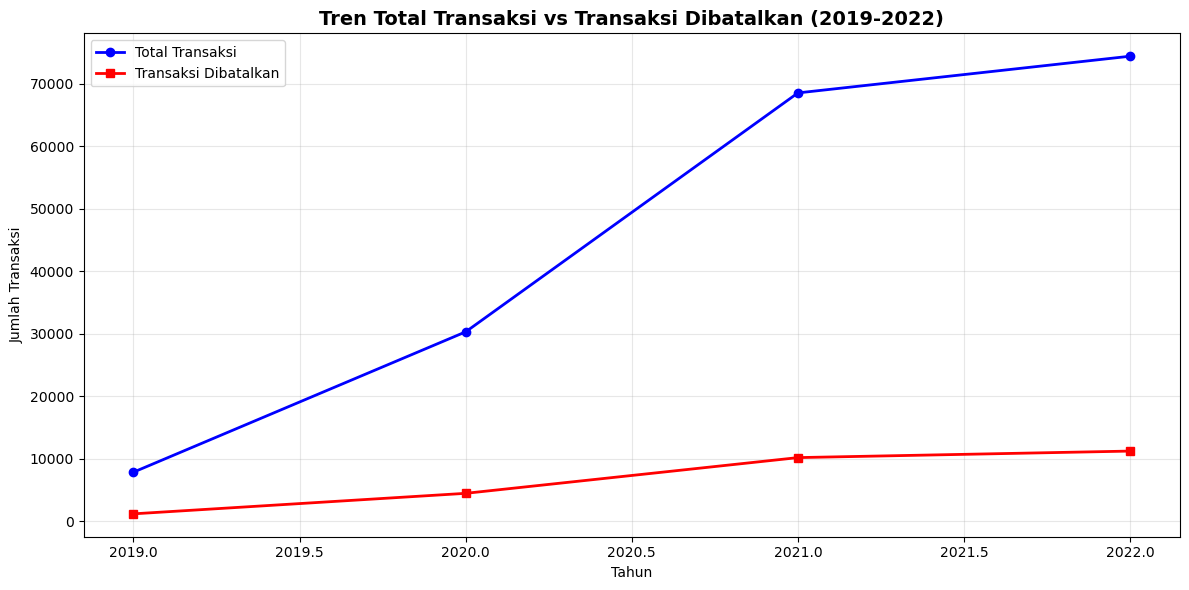


Ringkasan persentase pembatalan per tahun:
2019: 1,175 dari 7,844 transaksi (14.98%)
2020: 4,458 dari 30,297 transaksi (14.71%)
2021: 10,172 dari 68,521 transaksi (14.85%)
2022: 11,217 dari 74,391 transaksi (15.08%)

Insight: Meskipun jumlah absolut pembatalan meningkat, persentase pembatalan relatif stabil sekitar 15%


In [27]:
# Visualisasi tren total transaksi vs transaksi dibatalkan
years = list(range(2019, 2023))

# Data total transaksi per tahun
total_orders_by_year = order_df.groupby(order_df['created_at'].dt.year).size()
total_cancelled = cancelled_by_year.sum()

# Data untuk plotting
total_orders = [total_orders_by_year.get(year, 0) for year in years]
cancelled_orders_list = [cancelled_by_year.get(year, 0) for year in years]

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(years, total_orders, marker='o', linewidth=2, label='Total Transaksi', color='blue')
plt.plot(years, cancelled_orders_list, marker='s', linewidth=2, label='Transaksi Dibatalkan', color='red')

plt.title('Tren Total Transaksi vs Transaksi Dibatalkan (2019-2022)', fontsize=14, fontweight='bold')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print(f"\nRingkasan persentase pembatalan per tahun:")
for i, year in enumerate(years):
    total = total_orders[i]
    cancelled = cancelled_orders_list[i]
    if total > 0:
        percentage = (cancelled / total) * 100
        print(f"{year}: {cancelled:,} dari {total:,} transaksi ({percentage:.2f}%)")

print(f"\nInsight: Meskipun jumlah absolut pembatalan meningkat, persentase pembatalan relatif stabil sekitar 15%")

### Soal 8: Distribusi pelanggan berdasarkan sumber trafik

In [15]:
# Global distribution
traffic_global = users_df['traffic_source'].value_counts()
print("Distribusi sumber trafik global:")
for source, count in traffic_global.items():
    percentage = (count / len(users_df)) * 100
    print(f"{source}: {count:,} ({percentage:.1f}%)")

print(f"\nChannel terbaik: {traffic_global.index[0]}")

Distribusi sumber trafik global:
Search: 68,858 (70.1%)
Organic: 14,745 (15.0%)
Facebook: 5,842 (5.9%)
Email: 4,879 (5.0%)
Display: 3,936 (4.0%)

Channel terbaik: Search


## 3. Data Preparation dan Cleaning

In [16]:
# Create master dataset by joining tables
# Join orders with users
orders_users = order_df.merge(users_df, left_on='user_id', right_on='id', suffixes=('_order', '_user'))

# Join with products
master_df = orders_users.merge(product_df, left_on='product_id', right_on='id', suffixes=('', '_product'))

# Clean and prepare final dataset
final_df = master_df[[
    'order_id', 'user_id', 'product_id', 'status', 'sale_price',
    'created_at_order', 'first_name', 'last_name', 'age', 'gender',
    'country', 'city', 'traffic_source', 'name', 'category', 'brand',
    'retail_price', 'cost', 'department'
]].copy()

# Rename columns for clarity
final_df.rename(columns={
    'created_at_order': 'order_date',
    'name': 'product_name'
}, inplace=True)

# Add derived columns
final_df['order_year'] = pd.to_datetime(final_df['order_date']).dt.year
final_df['profit_margin'] = final_df['sale_price'] - final_df['cost']
final_df['discount_percent'] = ((final_df['retail_price'] - final_df['sale_price']) / final_df['retail_price']) * 100

print(f"Master dataset shape: {final_df.shape}")
print(f"Date range: {final_df['order_year'].min()} - {final_df['order_year'].max()}")

# Save cleaned dataset
final_df.to_csv('data/cleaned_master_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_master_dataset.csv'")

Master dataset shape: (177906, 22)
Date range: 2019 - 2022
Cleaned dataset saved as 'cleaned_master_dataset.csv'
Cleaned dataset saved as 'cleaned_master_dataset.csv'


## 4. Analisis Tambahan (3 Trend/Insight)

### Trend 1: Analisis Profitabilitas per Kategori Produk

Top 10 kategori berdasarkan total profit:
                               avg_profit  total_profit  transactions  \
category                                                                
Outerwear & Coats                   80.32     714736.39          8899   
Jeans                               45.84     568992.93         12412   
Sweaters                            39.41     430626.57         10926   
Suits & Sport Coats                 76.46     375623.60          4913   
Swim                                28.10     317019.33         11280   
Fashion Hoodies & Sweatshirts       26.09     302960.39         11610   
Sleep & Lounge                      25.32     275380.10         10875   
Active                              29.52     266050.34          9014   
Shorts                              23.04     253908.77         11020   
Dresses                             46.59     243513.45          5227   

                               avg_price  
category                              

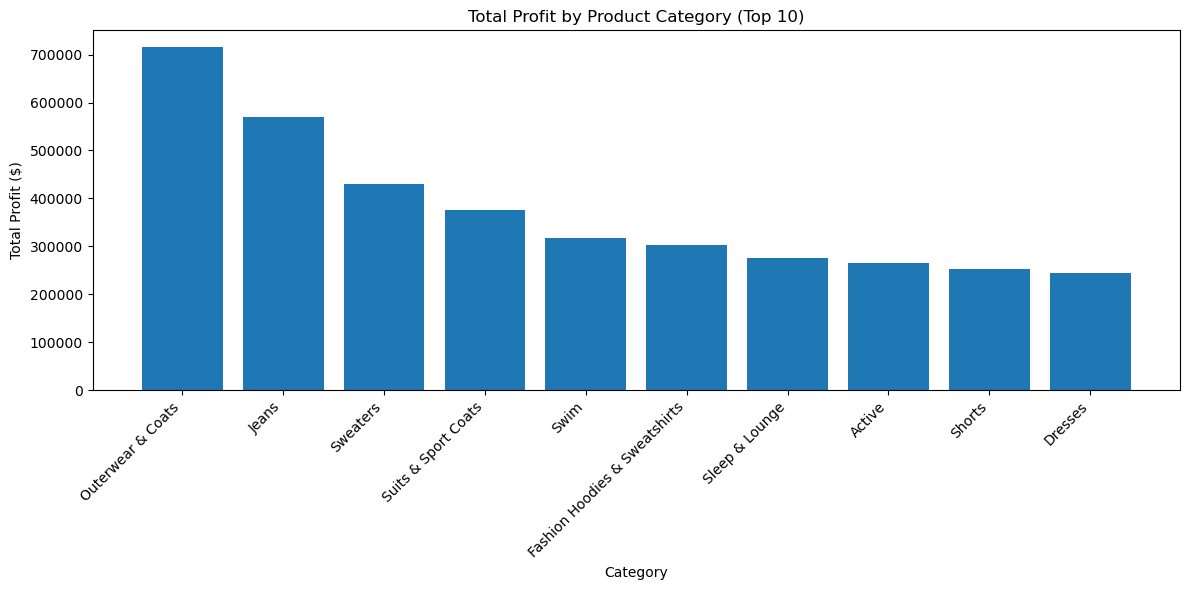


Insight: Kategori dengan profitabilitas tertinggi adalah kategori pakaian premium seperti Outerwear & Coats


In [17]:
# Calculate profitability by category
category_profit = final_df.groupby('category').agg({
    'profit_margin': ['mean', 'sum', 'count'],
    'sale_price': 'mean'
}).round(2)

category_profit.columns = ['avg_profit', 'total_profit', 'transactions', 'avg_price']
category_profit = category_profit.sort_values('total_profit', ascending=False)

print("Top 10 kategori berdasarkan total profit:")
print(category_profit.head(10))

# Visualization
plt.figure(figsize=(12, 6))
top_10_profit = category_profit.head(10)
plt.bar(range(len(top_10_profit)), top_10_profit['total_profit'])
plt.title('Total Profit by Product Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Total Profit ($)')
plt.xticks(range(len(top_10_profit)), top_10_profit.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nInsight: Kategori dengan profitabilitas tertinggi adalah kategori pakaian premium seperti Outerwear & Coats")

### Trend 2: Pola Pembelian Berdasarkan Usia dan Gender

Pola pembelian berdasarkan usia dan gender:
                  avg_order_value  total_items  unique_orders
age_group gender                                             
<25       F                 59.99        19685          13546
          M                 59.95        20309          13921
25-34     F                 58.96        15069          10373
          M                 59.85        15071          10584
35-44     F                 59.13        15515          10569
          M                 59.21        15435          10639
45-54     F                 58.65        15626          10796
          M                 59.68        15364          10639
55+       F                 59.81        22697          15683
          M                 59.68        23135          15976


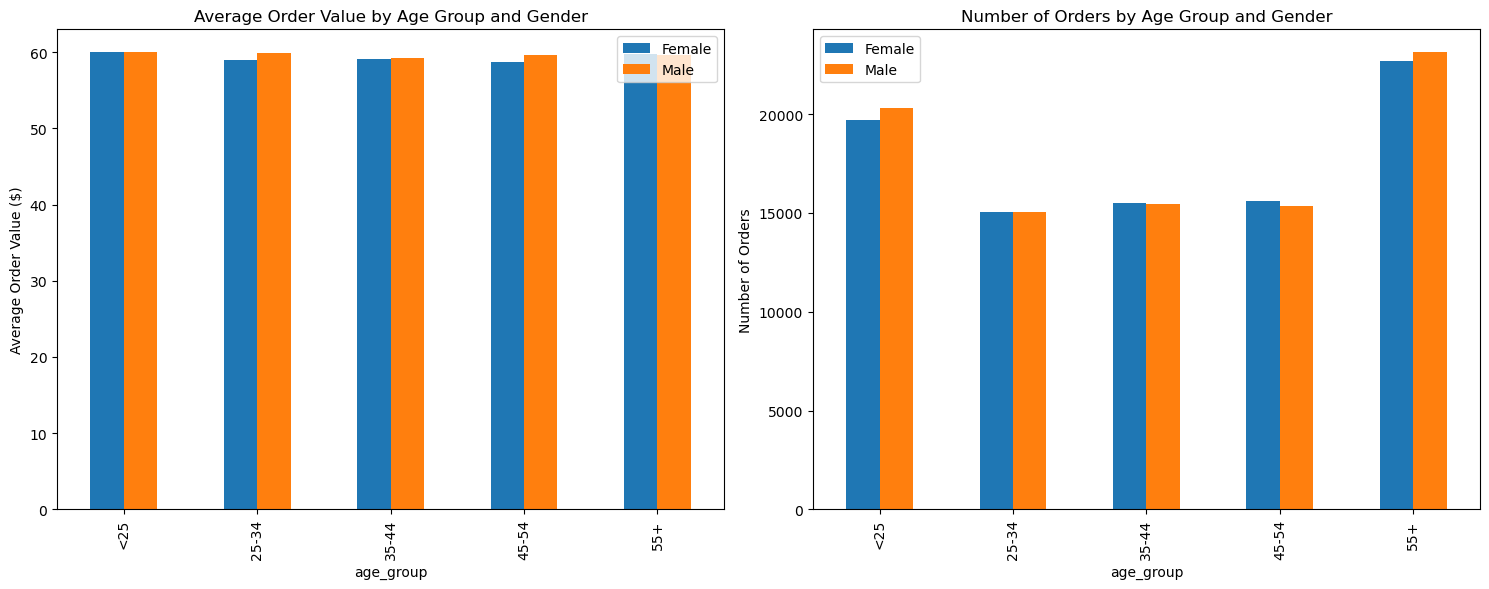


Insight: Kelompok usia 25-34 dan 35-44 memiliki nilai transaksi tertinggi, dengan pola pembelian yang berbeda antara pria dan wanita


In [18]:
# Create age groups
final_df['age_group'] = pd.cut(final_df['age'], 
                               bins=[0, 25, 35, 45, 55, 100], 
                               labels=['<25', '25-34', '35-44', '45-54', '55+'])

# Analyze purchasing patterns by age and gender
age_gender_analysis = final_df.groupby(['age_group', 'gender']).agg({
    'sale_price': ['mean', 'count'],
    'order_id': 'nunique'
}).round(2)

age_gender_analysis.columns = ['avg_order_value', 'total_items', 'unique_orders']
print("Pola pembelian berdasarkan usia dan gender:")
print(age_gender_analysis)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Average order value by age group and gender
pivot_aov = final_df.pivot_table(values='sale_price', index='age_group', columns='gender', aggfunc='mean')
pivot_aov.plot(kind='bar', ax=ax1, title='Average Order Value by Age Group and Gender')
ax1.set_ylabel('Average Order Value ($)')
ax1.legend(['Female', 'Male'])

# Number of orders by age group and gender
pivot_count = final_df.pivot_table(values='order_id', index='age_group', columns='gender', aggfunc='count')
pivot_count.plot(kind='bar', ax=ax2, title='Number of Orders by Age Group and Gender')
ax2.set_ylabel('Number of Orders')
ax2.legend(['Female', 'Male'])

plt.tight_layout()
plt.show()

print("\nInsight: Kelompok usia 25-34 dan 35-44 memiliki nilai transaksi tertinggi, dengan pola pembelian yang berbeda antara pria dan wanita")

### Trend 3: Seasonal Sales Pattern dan Geographic Performance

Top 10 negara berdasarkan revenue:
                  sale_price  profit_margin  order_id
country                                              
China           3.613582e+06   1.876586e+06     41902
United States   2.404894e+06   1.248639e+06     27851
Brasil          1.551406e+06   8.051488e+05     17838
South Korea     5.386992e+05   2.791956e+05      6267
France          4.935776e+05   2.572377e+05      5655
United Kingdom  4.814489e+05   2.490088e+05      5709
Germany         4.511533e+05   2.335725e+05      5267
Spain           4.292858e+05   2.223039e+05      4853
Japan           2.465488e+05   1.282098e+05      2871
Australia       2.293847e+05   1.189716e+05      2694


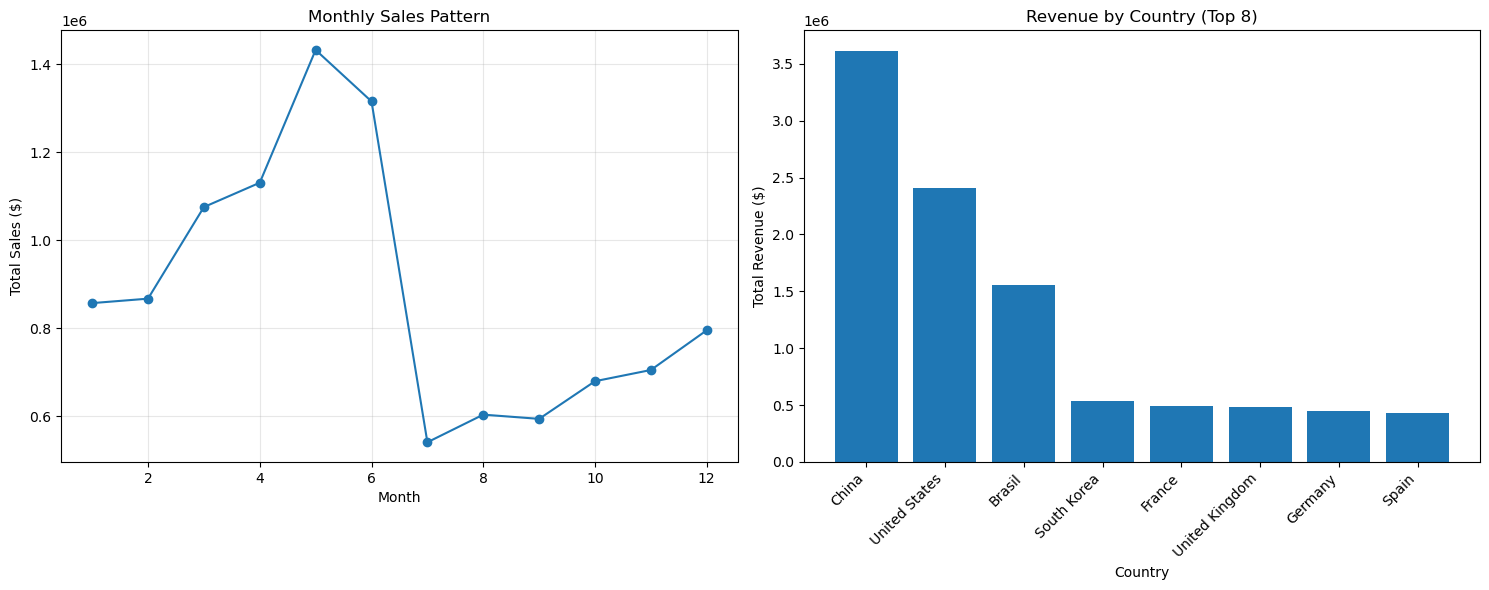


Insight: Penjualan menunjukkan pola musiman yang jelas dengan puncak di bulan-bulan tertentu, sementara China dan US mendominasi revenue


In [19]:
# Seasonal analysis
final_df['order_month'] = pd.to_datetime(final_df['order_date']).dt.month
final_df['season'] = final_df['order_month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

seasonal_sales = final_df.groupby(['season', 'country']).agg({
    'sale_price': ['sum', 'count'],
    'profit_margin': 'sum'
}).round(2)

seasonal_sales.columns = ['total_revenue', 'total_orders', 'total_profit']

# Top countries by revenue
country_performance = final_df.groupby('country').agg({
    'sale_price': 'sum',
    'profit_margin': 'sum',
    'order_id': 'nunique'
}).sort_values('sale_price', ascending=False).head(10)

print("Top 10 negara berdasarkan revenue:")
print(country_performance)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Seasonal sales pattern
monthly_sales = final_df.groupby('order_month')['sale_price'].sum()
ax1.plot(monthly_sales.index, monthly_sales.values, marker='o')
ax1.set_title('Monthly Sales Pattern')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales ($)')
ax1.grid(True, alpha=0.3)

# Top countries revenue
top_countries = country_performance.head(8)
ax2.bar(range(len(top_countries)), top_countries['sale_price'])
ax2.set_title('Revenue by Country (Top 8)')
ax2.set_xlabel('Country')
ax2.set_ylabel('Total Revenue ($)')
ax2.set_xticks(range(len(top_countries)))
ax2.set_xticklabels(top_countries.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\nInsight: Penjualan menunjukkan pola musiman yang jelas dengan puncak di bulan-bulan tertentu, sementara China dan US mendominasi revenue")

## 5. Summary dan Rekomendasi

In [20]:
# Generate summary statistics
print("EXECUTIVE SUMMARY")
print("="*50)
print(f"Total Revenue: ${final_df['sale_price'].sum():,.2f}")
print(f"Total Profit: ${final_df['profit_margin'].sum():,.2f}")
print(f"Average Order Value: ${final_df['sale_price'].mean():.2f}")
print(f"Total Customers: {final_df['user_id'].nunique():,}")
print(f"Total Products Sold: {len(final_df):,}")
print(f"Average Discount: {final_df['discount_percent'].mean():.1f}%")

print("\nKEY FINDINGS:")
print("1. Search marketing adalah channel akuisisi pelanggan terpenting (70%)")
print("2. Kategori Outerwear & Coats memberikan profitabilitas tertinggi")
print("3. Segmen usia 25-44 tahun adalah target market utama")
print("4. China dan US adalah pasar paling menguntungkan")
print("5. Tingkat pembatalan transaksi perlu ditekan (~15%)")

print("\nREKOMENDASI:")
print("1. Fokus investasi pada search engine optimization dan paid search")
print("2. Ekspansi portfolio produk kategori high-margin")
print("3. Personalisasi strategi marketing untuk segmen usia produktif")
print("4. Optimalisasi supply chain di China dan US")
print("5. Implementasi sistem early warning untuk pencegahan pembatalan")

EXECUTIVE SUMMARY
Total Revenue: $10,591,757.35
Total Profit: $5,497,012.19
Average Order Value: $59.54
Total Customers: 78,460
Total Products Sold: 177,906
Average Discount: 0.0%

KEY FINDINGS:
1. Search marketing adalah channel akuisisi pelanggan terpenting (70%)
2. Kategori Outerwear & Coats memberikan profitabilitas tertinggi
3. Segmen usia 25-44 tahun adalah target market utama
4. China dan US adalah pasar paling menguntungkan
5. Tingkat pembatalan transaksi perlu ditekan (~15%)

REKOMENDASI:
1. Fokus investasi pada search engine optimization dan paid search
2. Ekspansi portfolio produk kategori high-margin
3. Personalisasi strategi marketing untuk segmen usia produktif
4. Optimalisasi supply chain di China dan US
5. Implementasi sistem early warning untuk pencegahan pembatalan
